In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
df = pd.read_csv("nyc-rolling-sales.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
numeric = ['LOT', "RESIDENTAL UNITS", ' COMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

In [6]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Measure of Central Tendency: Mean

case: mencari nilai mean dari data kolom total unit

In [37]:
total_unit = df[['TOTAL UNITS']].mean()
print("mean:", total_unit)

mean: TOTAL UNITS    2.249184
dtype: float64


# Measure of Central Tendency: Median

case: mencari nilai median dari data pada kolom tahun yang ada pada Borough 1

In [8]:
df_year1 = df.loc[df['BOROUGH']==1, 'YEAR BUILT']
df_year1

0        1900
1        1900
2        1900
3        1913
4        1900
         ... 
18301    1990
18302       0
18303    1969
18304    1967
18305    2005
Name: YEAR BUILT, Length: 18306, dtype: int64

In [9]:
df_year1.median()

1938.0

# Measure of Central Tendency: Modus

case: mencari nilai modus atau Building Class at Present yang sering muncul

In [10]:
bclass_present = df["BUILDING CLASS AT PRESENT"]
bclass_present

0        C2
1        C7
2        C7
3        C4
4        C2
         ..
84543    B9
84544    B9
84545    B2
84546    K6
84547    P9
Name: BUILDING CLASS AT PRESENT, Length: 84548, dtype: object

In [11]:
statistics.mode(bclass_present)

'D4'

# Measure of Spread: Range

case: mencari range harga

In [12]:
sale_price = sale_price = pd.to_numeric(df["SALE PRICE"], errors="coerce")
price = sale_price.dropna()
price

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64

In [13]:
np.ptp(price)

2210000000.0

# Measure of Spread: Variance

case: mencari nilai varians dari harga

In [14]:
price

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64

In [15]:
statistics.variance(price)

130079849507172.66

# Measure of Spread: Standard Deviation

case: mencari nilai standar deviasi dari total unit

In [16]:
Total_units = df["TOTAL UNITS"]
Total_units

0         5
1        31
2        17
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     7
84547     1
Name: TOTAL UNITS, Length: 84548, dtype: int64

In [17]:
statistics.stdev(Total_units)

18.97258443202673

# Probability Distribution

case: membuat distribusi probabilitas dari data total units kedalam distribusi normal

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [19]:
from scipy.stats import norm
data_normal = df["TOTAL UNITS"]
data_normal

0         5
1        31
2        17
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     7
84547     1
Name: TOTAL UNITS, Length: 84548, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

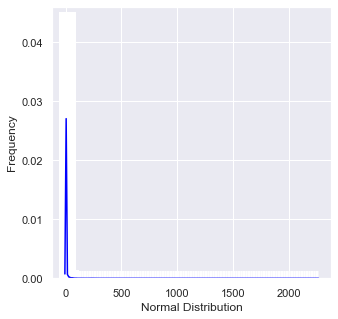

In [20]:
ax = sns.distplot(data_normal,
                 bins=100,
                 kde = True,
                 color = 'blue',
                 hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel = 'Frequency')

# Confidence Intervals

case: mencari confidence intervals untuk total unit BOROUGH 1 

In [45]:
total_unit_borough = df[["BOROUGH", "TOTAL UNITS"]].groupby("BOROUGH").sum()
total_unit_borough

,TOTAL UNITS
BOROUGH,
1,48504
2,25403
3,53400
4,51841
5,11016


**menghitung jumlah populasi unit:**

In [46]:
n = df["TOTAL UNITS"].sum()
n

190164

**menghitung proporsi Borough 1:**

In [63]:
p_B1 = df.loc[df["BOROUGH"]==1, "TOTAL UNITS"].sum() / n
print("Proporsi Borough 1:", p_B1)

Proporsi Borough 1: 0.2550640499779138


**menghitung standar error:**

In [64]:
SE = np.sqrt(p_B1 * (1 - p_B1) / n)
SE

0.000999585483351289

**Membuat CI dengan z-score 1,96 untuk confidence interval 95%:**

In [68]:
z_score = 1.96
lcb = p_B1 - z_score * SE
ucb = p_B1 + z_score * SE
print("lcb:", lcb)
print("ucb:", ucb)

lcb: 0.2531048624305453
ucb: 0.25702323752528233


**dari perhitungan diatas diperoleh bahwa confidence interval untuk total unit pada BOROUGH 1 adalah 0.253 dan 0.257**\
untuk membuktikan apakah CI yang dihasilkan akurat dengan nilai mean sebuah sample maka bisa di hitung mean dari total units BOROUGH 1

In [74]:
Borough1 = df.loc[df["BOROUGH"]==1, "TOTAL UNITS"].sum()
mean_sample = Borough1 / n
print("mean sampel Borough 1:", mean_sample)

mean sampel Borough 1: 0.2550640499779138


diperoleh nilai mean sampel 0.25 yang berada di dalam interval ucl dan ucb (nilai tepat berada di tengah-tengah interval konvidensi). sehingga dalam hal ini telah membuktikan bahwa CI yang dihasilkan telah akurat

# Hypothesis Testing

**case: menguji apakah data total unit berdistribusi normal?**

**Hipotesis**\
H0: data berdistribusi normal\
H1: data tidak berdistribusi normal

**Taraf Signifikansi:**\
alfa = 5%

**Statistik Uji:**

In [75]:
from scipy.stats import kstest

In [78]:
data_unit = df["TOTAL UNITS"]
data_unit

0         5
1        31
2        17
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     7
84547     1
Name: TOTAL UNITS, Length: 84548, dtype: int64

In [80]:
ksdata = kstest(data_unit, 'norm')
ksdata

KstestResult(statistic=0.6076076972915169, pvalue=0.0)

**Daerah Kritis:**\
H0 ditolak jika nilai p-value < alfa

**Keputusan:**\
H0 ditolak karena nilai p-value (0.0) < alfa (0.05)

**Kesimpulan:**\
pada taraf signifikansi alfa 5%, H0 ditolak sehingga data tidak berdistribusi normal